In [1]:
from helpers import copy, nx, ic

from simple_four_con import graph_data

from canonical_order_kant import KantCanonicalOrder

from rel2 import REL2

from edge_label import EdgeLabeling, EdgeColorings

from helpers_classes import CardinalDirections



In [2]:
co = KantCanonicalOrder(copy.deepcopy(graph_data))
co.initialize_order()
co.finish_order()

ic| f"updating chords for  {node_index} to {num_chords}": 'updating chords for  7 to 1'
ic| f"updating chords for  {node_index} to {num_chords}": 'updating chords for  5 to 2'
ic| f"updating chords for  {node_index} to {num_chords}": 'updating chords for  5 to 1'
ic| f"{node_index} has no more chords": '5 has no more chords'
ic| f"updating chords for  {node_index} to {num_chords}": 'updating chords for  6 to 1'
ic| f"{node_index} has no more chords": '6 has no more chords'
ic| f"{node_index} has no more chords": '7 has no more chords'
ic| f"ISSUE  FINDING UNMARKED CYCLE when vk = {self.vk}": 'ISSUE  FINDING UNMARKED CYCLE when vk = 2'
ic| f"completed order - vk == {self.vk}": 'completed order - vk == 1'


In [3]:
co.rel_helper

{7: {'unordered_boundary': [0, 1, 3, 4, 6], 'ordered_boundary': []},
 6: {'unordered_boundary': [0, 7, 5, 3, 4, 6], 'ordered_boundary': []},
 5: {'unordered_boundary': [0, 7, 5, 4, 6], 'ordered_boundary': []},
 4: {'unordered_boundary': [0, 7, 5, 6], 'ordered_boundary': [1, 2, 3]},
 3: {'unordered_boundary': [0, 7, 6], 'ordered_boundary': [1, 2, 4, 3]},
 2: {'unordered_boundary': [], 'ordered_boundary': [1, 2, 4, 5]}}

### base edge approach

In [12]:
re = REL2(co)

In [15]:
curr_order = list(re.co.rel_helper.keys())[1]
curr_order

6

In [19]:
curr_node_index = re.get_node_index_by_order(curr_order)
curr_nbs = re.get_node_nbs(curr_node_index)

unordered_boundary = re.co.rel_helper[curr_order]["unordered_boundary"]

unordered_nbs = []

for node in unordered_boundary:
    if node in curr_nbs:
        unordered_nbs.append(node)

# create incoming edges
# find nb with least order => base edge
# find ix of base edge in unordered_nbs
# if ix == 0, then base edge is red and rest are blue
# if ix == len(unordered_nbs) -1, then base edge is blue and rest are red
# if neither, then u_nbs[0:ix] => red, and u_nbs[ix+1:] => blue 
# note special edges (LATER) => use to study permutation later.. 


In [21]:
unordered_nbs

[0, 7, 5, 3]

In [32]:
k = slice(1, 2)
unordered_nbs[k]

[7]

In [23]:
edges = [(curr_node_index, nb) for nb in unordered_nbs]

In [28]:
nb_orders = [re.get_order_by_node_index(nb) for nb in unordered_nbs]

base_ix = nb_orders.index(min(nb_orders))
base_ix

0

In [22]:
curr_node_index

1

### start rel

In [4]:
re = REL2(co)
re.RELCorners.order_all_corners()
# re.step_order_interior()
# re.plot_graph()


ic| edges: [(1, 2), (3, 2), (6, 5), (6, 7)]
ic| edges: [(0, 1), (0, 7), (3, 4), (5, 4)]


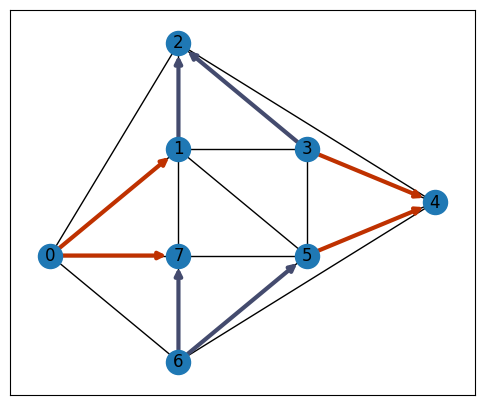

In [8]:
re.plot_graph()

### interior work 

ic| self.curr_node_index: 7, self.curr_order: 2
ic| edges: [(1, 2), (3, 2), (6, 5), (6, 7), (7, 1)]
ic| edges: [(0, 1), (0, 7), (3, 4), (5, 4), (7, 5)]


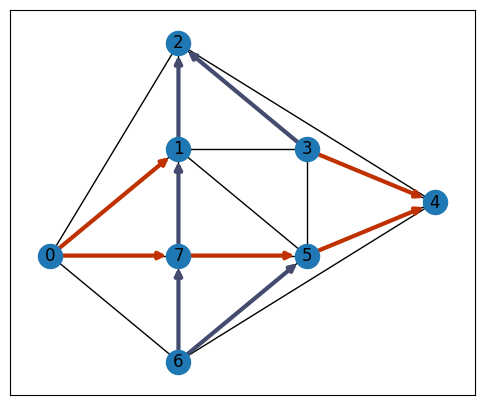

In [10]:
re.step_order_interior()
re.plot_graph()


ic| self.curr_node_index: 5, self.curr_order: 3
ic| edges: [(1, 2), (3, 2), (6, 5), (6, 7), (7, 1), (5, 1)]
ic| edges: [(0, 1), (0, 7), (3, 4), (5, 4), (7, 5), (5, 3)]


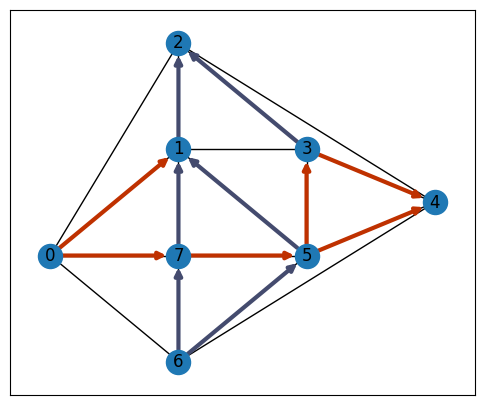

In [11]:
re.step_order_interior()
re.plot_graph()

In [9]:
re.step_order_interior()
re.plot_graph()

AssertionError: Not enough nbs of 4 have been ordered: NBs=[3, 5], Ordered NBs = [3]